# 🏥 MedTech AI Opportunity Finder

- 🌍 Task: Generate quirky healthcare/pharma AI business opportunities with pain points and solutions.
- 🧠 Model: Uses OpenAI GPT-4o-mini for creative business idea generation
- 🎯 Process: Three-step pipeline - Business Area → Pain Point → AI Solution
- 📌 Output Format: Markdown-formatted responses streamed in real-time with humor
- 🔧 Tools: OpenAI API and IPython display for interactive streaming
- 🧑‍💻 Skill Level: Beginner

🛠️ Requirements
- ⚙️ Hardware: ✅ CPU is sufficient — no GPU required
- 🔑 OpenAI API Key
- IPython environment (Jupyter/Colab)

---
📢 Discover more Agentic AI notebooks on my [GitHub repository](https://github.com/lisekarimi/agentverse) and explore additional AI projects on my [portfolio](https://lisekarimi.com).

## LLM Workflow

This 3-step process uses the prompt chaining pattern where each step builds on the previous response.

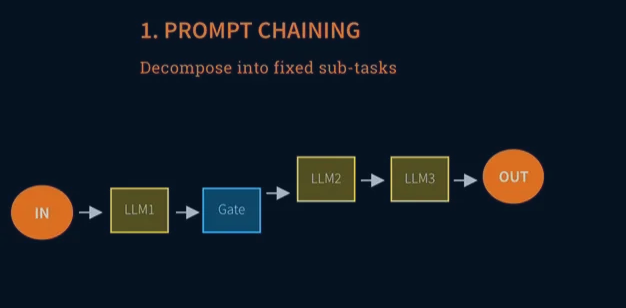

- Simple idea: Break a big problem into steps.
- Example: First LLM makes an outline → second LLM writes content.
- How it works: The output of one model becomes the input for the next.
- Why it helps: Keeps things structured and easier to solve step by step.
- Tip: If an early step is unclear or wrong, later steps will also be unclear or wrong (good input = good output, bad input = bad output).

In [ ]:
from openai import OpenAI
from IPython.display import display, Markdown, update_display

In [ ]:
client = OpenAI() # Automatically finds OPENAI_API_KEY without needing os.getenv() or load_dotenv().

In [ ]:
def stream_response(messages, section_title):
    """Stream response and display with real-time updates"""
    response_stream = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        stream=True
    )

    response = ""
    display_handle = display(Markdown(f"## {section_title}\n\n"), display_id=True)

    for chunk in response_stream:
        if chunk.choices[0].delta.content:
            response += chunk.choices[0].delta.content
            # Clean up any unwanted markdown artifacts
            cleaned_response = response.replace("```", "").replace("markdown", "")
            update_display(Markdown(f"## {section_title}\n\n{cleaned_response}"), display_id=display_handle.display_id)

    return response

In [ ]:
# Step 1: Business area
messages = [{"role": "user", "content": "Give me a quirky healthcare or pharma business area for an AI agent. Keep it short and clear."}]
business_idea = stream_response(messages, "🏢 Business Area")

In [ ]:
# Step 2: Pain point
messages = [{"role": "user", "content": f"What's broken about {business_idea}? Short and funny."}]
pain_point = stream_response(messages, "😵 What's Broken")

In [ ]:
# Step 3: AI solution
messages = [{"role": "user", "content": f"How would an AI agent solve this {pain_point}? Brief and clear."}]
solution = stream_response(messages, "🤖 AI to the Rescue")